<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: EDA of California Wildfire-Dataset

Rishi Kaul

2018130019

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishikaul22","key":"f92085a8b75a099967c714d2d15035b1"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            627  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-30 09:11:54          11386  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1513  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1385  
iamsourav

In [ ]:
! kaggle datasets download -d ananthu017/california-wildfire-incidents-20132020

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 33.2MB/s]


In [ ]:
! unzip /content/california-wildfire-incidents-20132020.zip

Archive:  /content/california-wildfire-incidents-20132020.zip
  inflating: California_Fire_Incidents.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filepath = '/content/California_Fire_Incidents.csv'
wildfire_df = pd.read_csv(filepath)

In [ ]:
wildfire_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [ ]:
wildfire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [ ]:
wildfire_df.isnull().sum()

AcresBurned                3
Active                     0
AdminUnit                  0
AirTankers              1608
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
ConditionStatement      1352
ControlStatement        1525
Counties                   0
CountyIds                  0
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Extinguished              59
Fatalities              1615
Featured                   0
Final                      0
FuelType                1624
Helicopters             1552
Injuries                1516
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
PersonnelInvolved       1432
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
StructuresDamaged       1569
StructuresDest

In [ ]:
wildfire_df['Started'] = pd.to_datetime(wildfire_df['Started'])
wildfire_df['Updated'] = pd.to_datetime(wildfire_df['Updated'])
wildfire_df['Extinguished'] = pd.to_datetime(wildfire_df['Extinguished'])

In [ ]:
wildfire_df['YearStarted'] = wildfire_df['Started'].dt.year
wildfire_df['MonthStarted'] = wildfire_df['Started'].dt.month

In [ ]:
wildfire_df['Started'].dtype

datetime64[ns, UTC]

In [ ]:
default_na = {
    'AcresBurned': 0, 
    'AirTankers': 0, 
    'ConditionStatement':'', 
    'ControlStatement':'', 
    'CrewsInvolved': 0, 
    'Dozers': 0, 
    'Engines': 0, 
    'Extinguished': 0, 
    'Fatalities': 0,
    'FuelType':'', 
    'Helicopters': 0, 
    'Injuries': 0, 
    'PersonnelInvolved': 0,
    'SearchDescription':'', 
    'StructuresDamaged': 0, 
    'StructuresDestroyed': 0,
    'StructuresEvacuated': 0, 
    'StructuresThreatened': 0, 
    'WaterTenders': 0
    }

In [ ]:
wildfire_df.fillna( default_na, inplace=True)

In [ ]:
wildfire_df.head()

,AcresBurned,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PersonnelInvolved,SearchDescription,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,Stanislaus National Forest/Yosemite National Park,0.0,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,55,0.0,0.0,0.0,2013-09-06 18:30:00+00:00,0.0,,0.0,0.0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,0.0,The Rim Fire was east of Groveland along Highw...,2013-08-17 15:25:00+00:00,0.0,0.0,0.0,0.0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06 18:30:00+00:00,0.0
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,0.0,2013,True,/incidents/2013/5/30/powerhouse-fire/,,,Los Angeles,19,0.0,0.0,0.0,2013-06-08 18:30:00+00:00,0.0,,0.0,0.0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,0.0,The Powerhouse Fire burned in May and June 201...,2013-05-30 15:28:00+00:00,0.0,0.0,0.0,0.0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08 18:30:00+00:00,0.0
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,0.0,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,33,0.0,0.0,0.0,2013-07-30 18:00:00+00:00,0.0,,0.0,0.0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,0.0,The Mountain Fire burned in July 2013 off High...,2013-07-15 13:43:00+00:00,0.0,0.0,0.0,0.0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30 18:00:00+00:00,0.0
3,27440.0,Tahoe National Forest,0.0,2013,False,/incidents/2013/8/10/american-fire/,,,Placer,31,0.0,0.0,0.0,2013-08-30 08:00:00+00:00,0.0,,0.0,0.0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,0.0,The American Fire burned in August 2013 off De...,2013-08-10 16:30:00+00:00,0.0,0.0,0.0,0.0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30 08:00:00+00:00,0.0
4,24251.0,Ventura County Fire/CAL FIRE,0.0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,56,47.0,8.0,117.0,2013-05-11 06:30:00+00:00,0.0,,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,2167.0,"The Springs Fire burned in May 2013, Southboun...",2013-05-02 07:01:00+00:00,6.0,10.0,0.0,0.0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11 06:30:00+00:00,11.0


In [ ]:
wildfire_df['Started'].dt.year

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1631    2019
1632    2019
1633    2019
1634    2019
1635    2019
Name: Started, Length: 1636, dtype: int64

In [ ]:
wildfire_df = wildfire_df[wildfire_df.YearStarted != 1969]

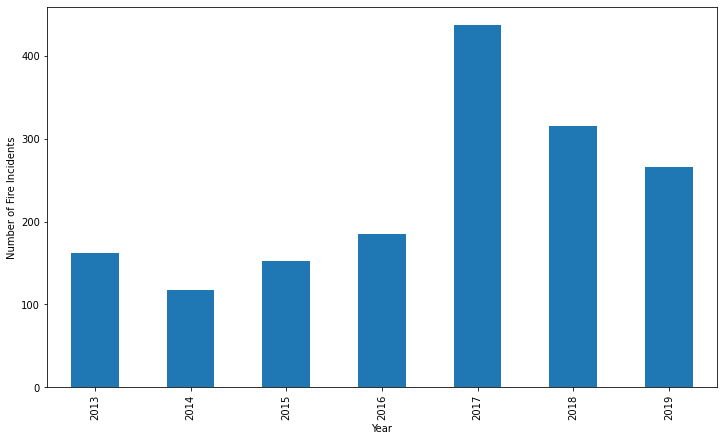

In [ ]:
# fire incidents vs year
wildfire_df['YearStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.show()

Text(0, 0.5, 'Number of Fire Incidents')

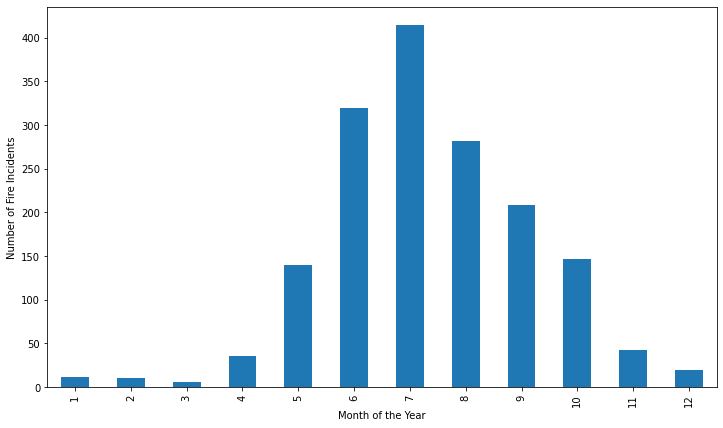

In [ ]:
wildfire_df['MonthStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,7))

plt.xlabel('Month of the Year')
plt.ylabel('Number of Fire Incidents')

Text(0, 0.5, 'Year of Fire Incident')

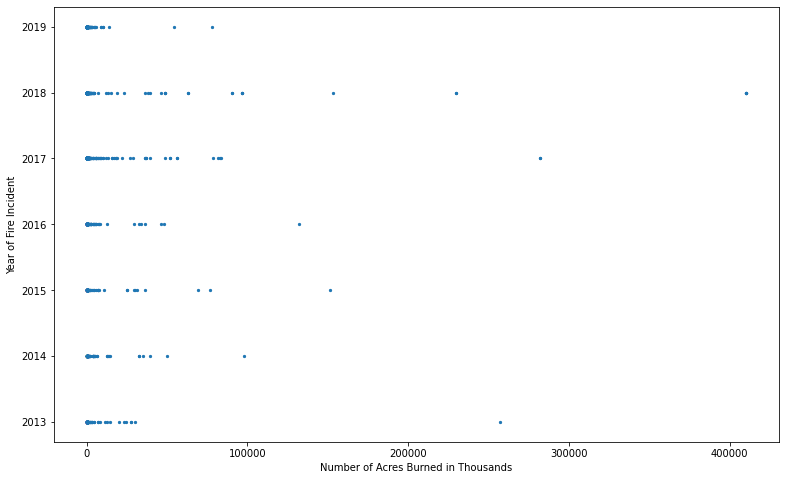

In [ ]:
wildfire_df.plot(kind='scatter', x='AcresBurned', y='YearStarted', figsize=(13,8), s=5)

plt.xlabel('Number of Acres Burned in Thousands')
plt.ylabel('Year of Fire Incident')

Text(0, 0.5, 'Number of Fatalities')

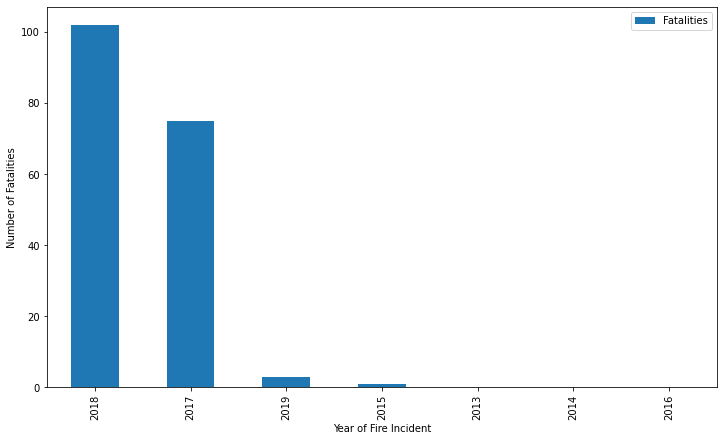

In [ ]:
wildfire_df[['Fatalities', 'YearStarted']].groupby('YearStarted').sum().sort_values('Fatalities', ascending=False).plot(kind='bar', figsize=(12,7))

plt.xlabel('Year of Fire Incident')
plt.ylabel('Number of Fatalities')

Text(0, 0.5, 'Number of Fatalities')

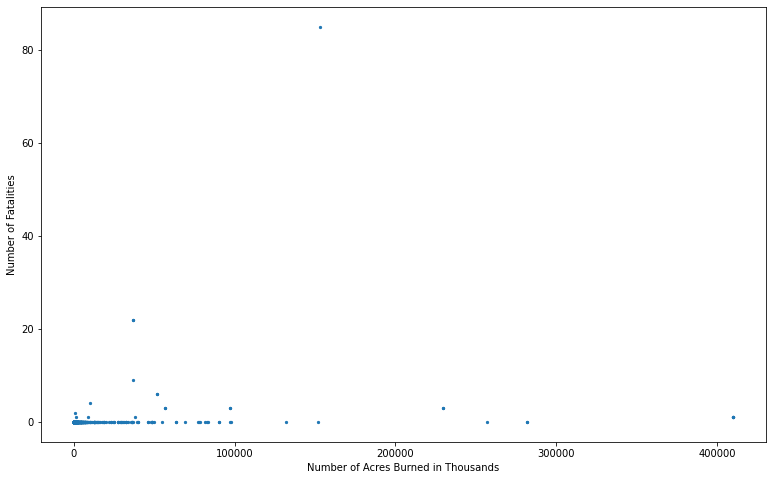

In [ ]:
wildfire_df.plot(kind='scatter', x='AcresBurned', y='Fatalities', figsize=(13,8), s=5)

plt.xlabel('Number of Acres Burned in Thousands')
plt.ylabel('Number of Fatalities')

Text(0, 0.5, 'Number of Incidents')

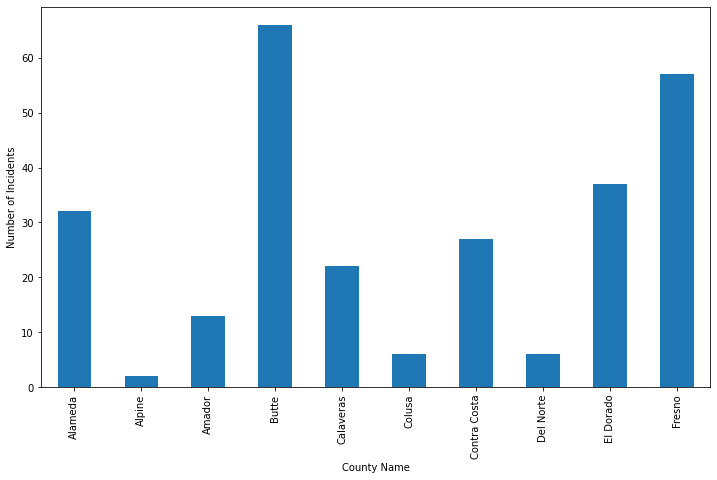

In [ ]:
wildfire_df['Counties'].value_counts().sort_index().head(10).plot(kind='bar', figsize=(12,7))

plt.xlabel('County Name')
plt.ylabel('Number of Incidents')